# Blob Effect demo


In [1]:
from blob_effect.script.pipeline import Pipeline
from blob_effect.service.utils.Save.SaveImage import SaveImage

In [2]:
# config設定
cfg = [
    {
        "TASK": "utils.Load.LoadImage",
        "PARAM": {"PATH": "data/demo1.png", "MODE": "RGB"},
    },
    {
        "TASK": "vision.Preprocess",
        "PROCESS": [
            {
                "TASK": "Resize",
                "PARAM": {"IMAGE": "LoadImage", "SIZE": {"WIDTH": 256, "HEIGHT": 256}},
            }
        ],
    },
    {
        "TASK": "vision.Effect",
        "PROCESS": [
            {
                "TASK": "BlobEffect",
                "PARAM": {
                    "IMAGE": "Resize",
                    "BLOB_NUM": 1500,
                    "RADIUS": {"MIN": 5, "MAX": 20},
                    "THICKNESS": {"MIN": 1, "MAX": 1},
                },
            }
        ],
    },
    {
        "TASK": "utils.Show",
        "PROCESS": [
            {
                "TASK": "ShowImage",
                "PARAM": {
                    "IMAGE": "LoadImage",
                },
            },
            {
                "TASK": "ShowImage",
                "PARAM": {
                    "IMAGE": "BlobEffect",
                },
            },
        ],
    },
]

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:57<00:00, 26.12it/s]


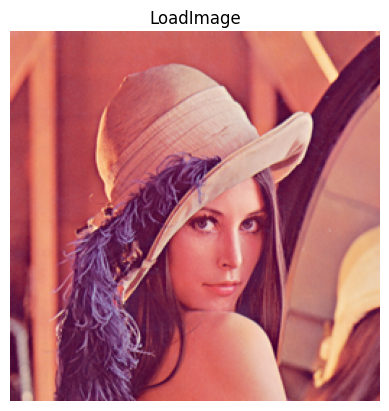

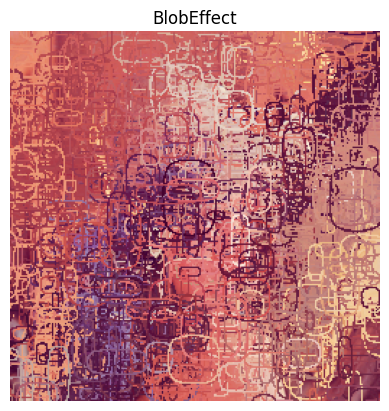

In [3]:
pipeline = Pipeline(cfg)
pipeline()

In [4]:
results = pipeline.results
key = list(results.keys())[-2]

In [5]:
SaveImage(results, {"IMAGE": key, "PATH": "output/notebook_blob.png"})